In [77]:
import numpy as np
import pandas as pd
import string
import networkx as nx
import matplotlib.pyplot as plt

In [28]:
df = pd.read_csv('ciaone.csv', sep=',')
df['birth'] = pd.to_datetime(df['birth'])
df['year'] = df['birth'].dt.year
lbls = df['worklabels'].values
df['worklabels'] = [ np.array(lbl.split(','), dtype=str) for lbl in lbls]

In [63]:
def extract_network(df, min_year, n_years):
    x = df[df.year >= min_year]
    x = x[x.year < min_year + n_years]
    net = nx.Graph() 
    for _, row1 in x.iterrows():
        z1 = row1.label
        cities1 = row1.worklabels
        for _, row2 in x.iterrows():
            z2 = row2.label
            net.add_node(z2)
            if(z1 != z2):
                cities2 = row2.worklabels
                res = np.intersect1d(cities1,cities2)
                if(len(res)>0):
                    net.add_edge(z1,z2,label=res)
    return net

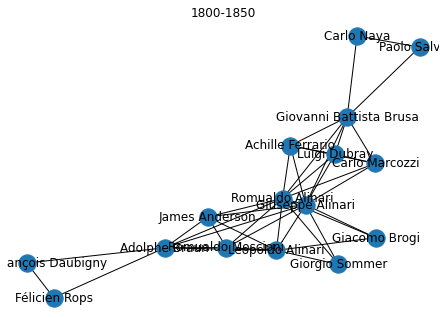

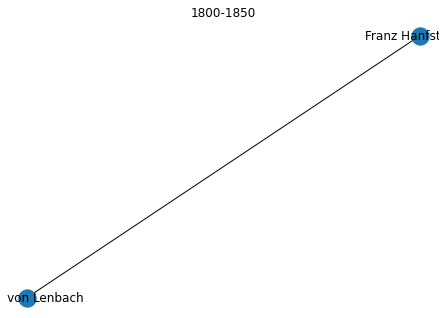

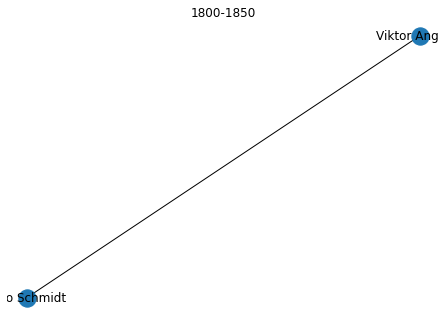

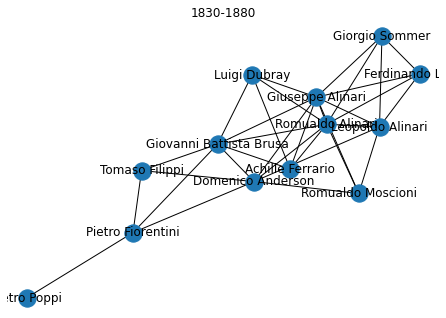

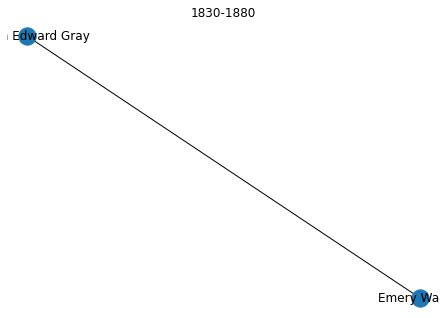

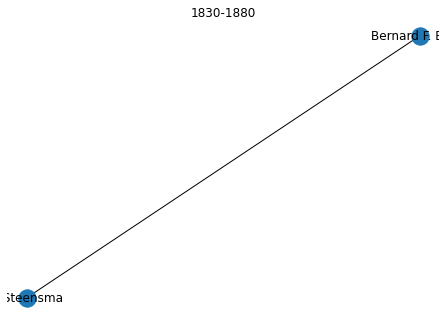

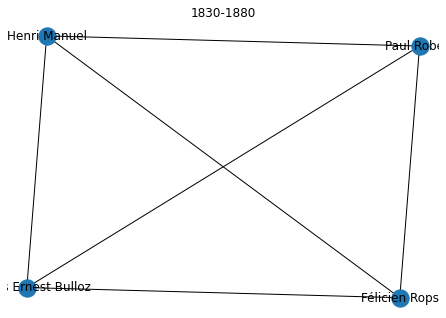

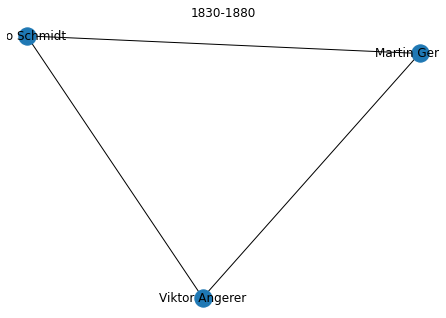

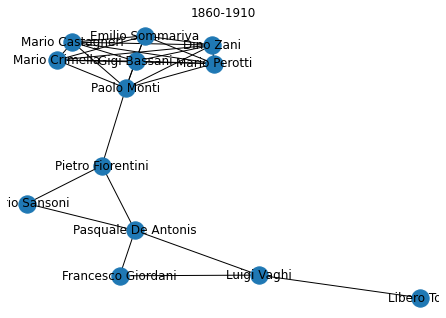

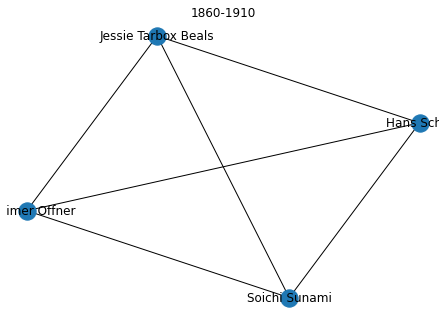

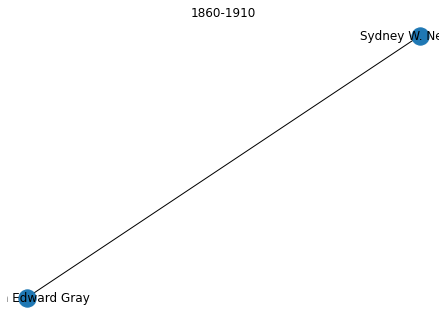

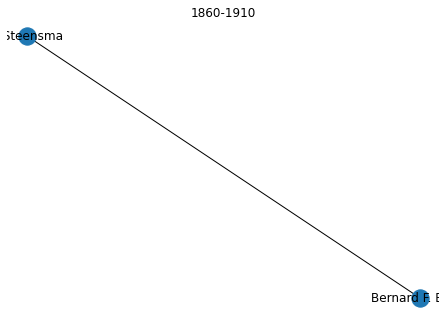

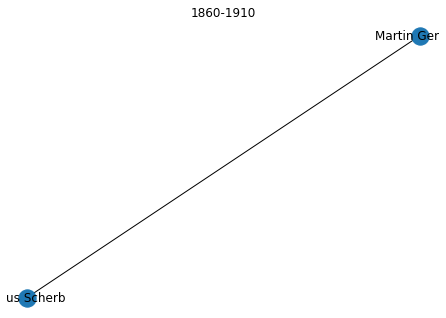

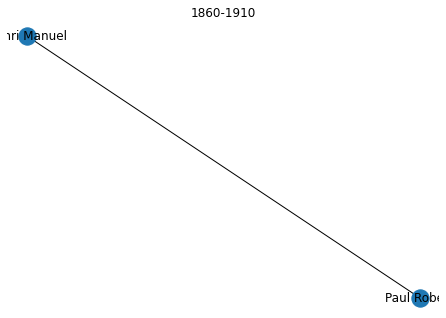

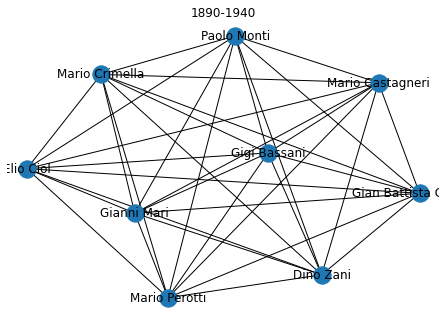

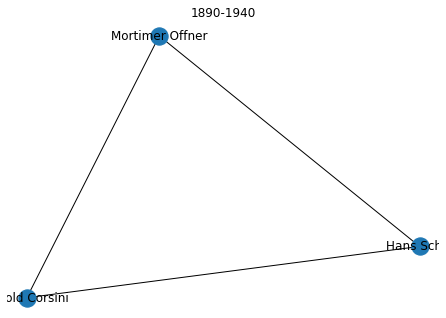

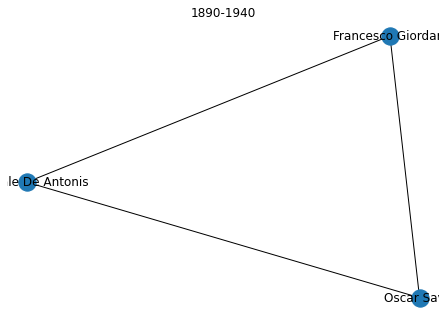

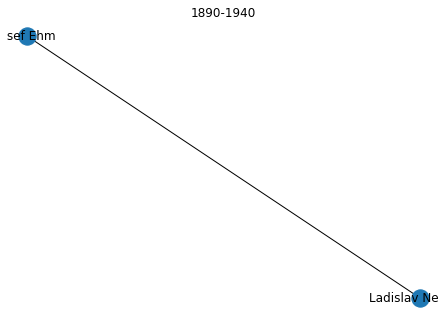

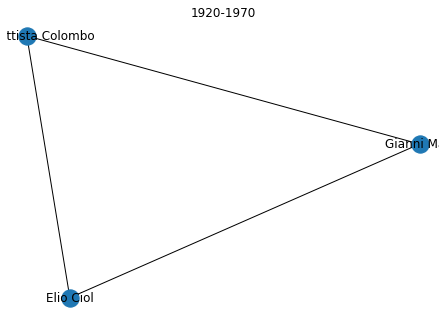

In [90]:
networks = []
starting_years = np.arange(1800, 1950, 30)
window_sz = 50
for s_year in starting_years:
    net = extract_network(df, s_year, window_sz)
    networks.append(net)
    conn_comps = nx.connected_components(net)
    for people in conn_comps:
        if(len(people)>1):
            S = net.subgraph(people).copy()
            nx.draw(S, with_labels=True)
            plt.title(str(s_year) + '-' + str(s_year+window_sz))
            plt.show()


In [78]:
%matplotlib inline